In [27]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from plotly import express as px

In [28]:
image1 = cv2.imread('mire_1.png')
image2 = cv2.imread('mire_2.png')
# cv2.imshow('image1', image1)
# cv2.waitKey(0)
# cv2.imshow('image2', image2)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

In [29]:
ret1, corners1 = cv2.findChessboardCorners(image1,(11,8))
ret2, corners2 = cv2.findChessboardCorners(image2,(11,8))   #number of points it has to find
# print(ret1)
print(len(corners1))
print(corners1)
# print(ret2)
print(len(corners2))

88
[[[569.15533  387.40332 ]]

 [[519.4816   385.9438  ]]

 [[470.1172   384.61594 ]]

 [[419.7884   383.28775 ]]

 [[369.6076   382.3157  ]]

 [[318.4884   381.37213 ]]

 [[267.53342  380.38293 ]]

 [[215.46744  379.35266 ]]

 [[162.99219  378.62924 ]]

 [[109.80231  378.0184  ]]

 [[ 54.955513 377.48337 ]]

 [[565.95764  336.73398 ]]

 [[517.60333  335.4439  ]]

 [[468.5475   333.93002 ]]

 [[419.5133   332.52423 ]]

 [[369.70242  331.18527 ]]

 [[319.72803  330.18427 ]]

 [[269.2293   328.9239  ]]

 [[218.49387  328.02762 ]]

 [[166.82867  326.98392 ]]

 [[114.38393  325.8484  ]]

 [[ 60.66472  325.21472 ]]

 [[563.5097   288.04315 ]]

 [[515.45215  286.43924 ]]

 [[467.4098   284.9126  ]]

 [[418.7464   283.35608 ]]

 [[370.15646  282.12717 ]]

 [[320.63373  280.69492 ]]

 [[271.1921   279.65094 ]]

 [[220.88191  278.4358  ]]

 [[170.5534   277.28763 ]]

 [[118.79167  275.6171  ]]

 [[ 66.35025  274.22665 ]]

 [[560.81433  240.57297 ]]

 [[513.6825   239.04773 ]]

 [[466.18497  237

In [30]:
# print(corners1.shape)
corners1_squeeze = np.squeeze(corners1, axis=1)
# print(corners2.shape)
corners2_squeeze = np.squeeze(corners2, axis=1)
# print(corners1.shape)

In [31]:
coord_px = np.concatenate((corners1_squeeze, corners2_squeeze), axis=0)
print(len(coord_px))

176


In [32]:
# min_x = []
origine_2D = corners1_squeeze[0]
print(origine_2D)

[569.15533 387.40332]


In [96]:
coord_mm = []
Nx,Ny = 11,8
x,y=0,0
for z in [0,100]:    
    for y in range(Ny):
        for x in range(Nx):
            coord_mm.append(np.array([x*-20,y*-20,z]))
coord_mm = np.array(coord_mm)
print(coord_mm.shape)
print(coord_mm)

(176, 3)
[[   0    0    0]
 [ -20    0    0]
 [ -40    0    0]
 [ -60    0    0]
 [ -80    0    0]
 [-100    0    0]
 [-120    0    0]
 [-140    0    0]
 [-160    0    0]
 [-180    0    0]
 [-200    0    0]
 [   0  -20    0]
 [ -20  -20    0]
 [ -40  -20    0]
 [ -60  -20    0]
 [ -80  -20    0]
 [-100  -20    0]
 [-120  -20    0]
 [-140  -20    0]
 [-160  -20    0]
 [-180  -20    0]
 [-200  -20    0]
 [   0  -40    0]
 [ -20  -40    0]
 [ -40  -40    0]
 [ -60  -40    0]
 [ -80  -40    0]
 [-100  -40    0]
 [-120  -40    0]
 [-140  -40    0]
 [-160  -40    0]
 [-180  -40    0]
 [-200  -40    0]
 [   0  -60    0]
 [ -20  -60    0]
 [ -40  -60    0]
 [ -60  -60    0]
 [ -80  -60    0]
 [-100  -60    0]
 [-120  -60    0]
 [-140  -60    0]
 [-160  -60    0]
 [-180  -60    0]
 [-200  -60    0]
 [   0  -80    0]
 [ -20  -80    0]
 [ -40  -80    0]
 [ -60  -80    0]
 [ -80  -80    0]
 [-100  -80    0]
 [-120  -80    0]
 [-140  -80    0]
 [-160  -80    0]
 [-180  -80    0]
 [-200  -80    0]
 

In [34]:
#centre optique
print(image1.shape)
i1 = image1.shape[0]/2
print(i1)
i2 = image1.shape[1]/2
print(i2)

(480, 640, 3)
240.0
320.0


In [35]:
#création de la matrice A de taille (Nx7) et le vecteur unitaire U1 de taille (Nx1)
Nx = 8
Ny = 11
A = np.zeros((Nx*Ny*2,7))
U1 = np.zeros((Nx*Ny*2,1))
coord_px_center = coord_px-np.array([i1,i2])
U1=coord_px_center[:,0]
for i in range(coord_mm.shape[0]):
    A[i,0] = np.multiply(coord_px_center[i,1],coord_mm[i,0])
    A[i,1] = np.multiply(coord_px_center[i,1],coord_mm[i,1])
    A[i,2] = np.multiply(coord_px_center[i,1],coord_mm[i,2])
    A[i,3] = coord_px_center[i,1]
    A[i,4] = np.multiply(-coord_px_center[i,0],coord_mm[i,0])
    A[i,5] = np.multiply(-coord_px_center[i,0],coord_mm[i,1])
    A[i,6] = np.multiply(-coord_px_center[i,0],coord_mm[i,2])

print(A.shape)
print(U1.shape)
# print(A)
print(U1)

(176, 7)
(176,)
[ 329.15533447  279.48162842  230.1171875   179.78839111  129.60760498
   78.48840332   27.53341675  -24.53256226  -77.0078125  -130.19769287
 -185.044487    325.9576416   277.60333252  228.54748535  179.51330566
  129.7024231    79.72802734   29.22930908  -21.50613403  -73.17132568
 -125.61607361 -179.33528137  323.50970459  275.45214844  227.40979004
  178.74639893  130.15646362   80.63372803   31.19210815  -19.11808777
  -69.44659424 -121.20832825 -173.64974976  320.81433105  273.68249512
  226.18496704  178.50820923  130.29046631   81.77883911   32.84967041
  -16.38983154  -66.3961792  -116.67436218 -168.58691406  318.81750488
  271.68621826  224.90792847  177.91030884  130.56863403   82.52178955
   34.5513916   -14.19700623  -63.41677856 -113.2047348  -163.88517761
  316.46777344  270.20550537  223.67852783  177.56915283  130.66958618
   83.40475464   35.64059448  -12.16912842  -60.33659363 -109.65882874
 -159.70085144  314.57830811  268.61972046  222.87493896  177

In [36]:
#Résolution du système linéaire A*L=U1
L = np.linalg.pinv(A)@U1
print(L.shape)
print(L)

(7,)
[ 3.77539277e-02 -1.61760493e-03  2.23944865e-05  4.92520511e+00
  9.29258168e-04  3.73715800e-02  3.45266924e-03]


In [37]:
o2c = 1/np.sqrt(L[4]**2+L[5]**2+L[6]**2)
beta = o2c*np.sqrt(L[0]**2+L[1]**2+L[2]**2)
o1c = (L[3]*o2c)/beta
r11 = L[0]*o2c/beta
r12 = L[1]*o2c/beta
r13 = L[2]*o2c/beta
r21 = L[4]*o2c
r22 = L[5]*o2c
r23 = L[6]*o2c
print(o2c)
print(beta)
print(o1c)
print(r11)
print(r12)
print(r13)
print(r21)
print(r22)
print(r23)

26.636666407776698
1.0065615957198886
130.33583442894135
0.9990831963873055
-0.042806722498616494
0.0005926258949777437
0.0247523398147721
0.9954543095870056
0.09196759863317049


In [38]:
vectoriel = np.cross([r11,r12,r13],[r21,r22,r23])
print(vectoriel)
r31 = vectoriel[0]
r32 = vectoriel[1]
r33 = vectoriel[2]
print(r31)
print(r32)
print(r33)

[-0.00452676 -0.09186861  0.99560124]
-0.004526763474682722
-0.09186861352895723
0.9956012400213463


In [39]:
phi = -np.arctan(r23/r33)
gamma = -np.arctan(r12/r11)
omega = np.arctan(r13/(-r23*np.sin(phi)+r33*np.cos(phi)))
print(phi)
print(gamma)
print(omega)

-0.09211252591572092
0.04281981409789569
0.0005927207075068636


In [40]:
B = np.zeros((Nx*Ny*2,2))
R = np.zeros((Nx*Ny*2,1))
for i in range(coord_mm.shape[0]):
    B[i,0] = coord_px_center[i,1]
    B[i,1] = -(r21*coord_mm[i,0]+r22*coord_mm[i,1]+r23*coord_mm[i,2]+o2c)
    R[i,0] = -coord_px_center[i,1]*(r31*coord_mm[i,0]+r32*coord_mm[i,1]+r33*coord_mm[i,2])
print(B.shape)
print(R.shape)
print(B)
print(R)

(176, 2)
(176, 1)
[[  67.40332031  -26.63666641]
 [  65.94378662  -26.14161961]
 [  64.61593628  -25.64657282]
 [  63.28775024  -25.15152602]
 [  62.31570435  -24.65647922]
 [  61.37213135  -24.16143243]
 [  60.38293457  -23.66638563]
 [  59.35266113  -23.17133883]
 [  58.62924194  -22.67629204]
 [  58.0184021   -22.18124524]
 [  57.48336792  -21.68619844]
 [  16.73397827   -6.72758022]
 [  15.44390869   -6.23253342]
 [  13.93002319   -5.73748662]
 [  12.52423096   -5.24243983]
 [  11.18527222   -4.74739303]
 [  10.18426514   -4.25234623]
 [   8.92388916   -3.75729944]
 [   8.02761841   -3.26225264]
 [   6.98391724   -2.76720585]
 [   5.84838867   -2.27215905]
 [   5.21472168   -1.77711225]
 [ -31.95684814   13.18150598]
 [ -33.5607605    13.67655277]
 [ -35.08740234   14.17159957]
 [ -36.6439209    14.66664636]
 [ -37.87283325   15.16169316]
 [ -39.30508423   15.65673996]
 [ -40.34906006   16.15178675]
 [ -41.56420898   16.64683355]
 [ -42.71237183   17.14188035]
 [ -44.38290405   17.

In [41]:
#Résolution de B(o3c,f2) = R
o3c,f2 = np.linalg.pinv(B)@R
print(o3c)
print(f2)

[334.27974688]
[814.14426602]


In [42]:
f = 4
s2 = f/f2
print(s2)
f1 = beta*f2
print(f1)
s1 = s2/beta
print(s1)

[0.00491313]
[819.48635155]
[0.00488111]


In [43]:
#taille capteur webcam en mm
w = s1*image1.shape[0]
h = s2*image1.shape[1]
print(w)
print(h)

[2.34293103]
[3.14440586]


In [92]:
f1=f/s1[0]
f2 = f/s2[0]
print("valeurs debut")
print(f1)
print(f2)
print(r11)
print(r12)
print(r13)
print("valeurs fin")
Mint = np.array([[f1,0,i1,0],[0,f2,i2,0],[0,0,0,1]])
Mext = np.array([[r11,r12,r13,o1c],[r21,r22,r23,o2c],[r31,r32,r33,o3c[0]],[0,0,0,1]])
print(Mint.shape)
print(Mext.shape)
M= Mint@Mext
print(M)
alpha = r31*coord_mm[:,0]+r32*coord_mm[:,1]+r33*coord_mm[:,2]+o3c
print("alpha", alpha.shape, alpha[0])
print(M.shape)
print(coord_mm.shape)
quedesuns = np.ones((coord_mm.shape[0],1))
# print(quedesuns)
coord_mm_4d = np.concatenate((coord_mm,quedesuns),axis=1)
# print(coord_mm_4d)
# aU = M@coord_mm.T
# print(aU.shape)
aU = []
for i in range(coord_mm_4d.shape[0]):
    aUi = M@coord_mm_4d[i,:]
    Ui = aUi/alpha[i]
    # print(aUi.shape)
    aU.append(Ui)
    # aU[i,:] = aUi[0:3]
aU = np.array(aU)
print(aU.shape)
# U = np.divide(aU,alpha)
# print(aU)

valeurs debut
819.4863515469968
814.1442660157362
0.9990831963873055
-0.042806722498616494
0.0005926258949777437
valeurs fin
(3, 4)
(4, 4)
[[ 8.17648620e+02 -5.71279921e+01  2.39429946e+02  1.87035577e+05]
 [ 1.87034112e+01  7.81045462e+02  3.93467290e+02  1.28655608e+05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
alpha (176,) 334.2797468766572
(3, 4)
(176, 3)
(176, 3)


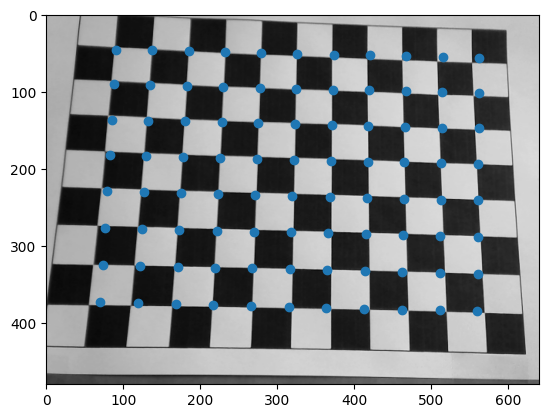

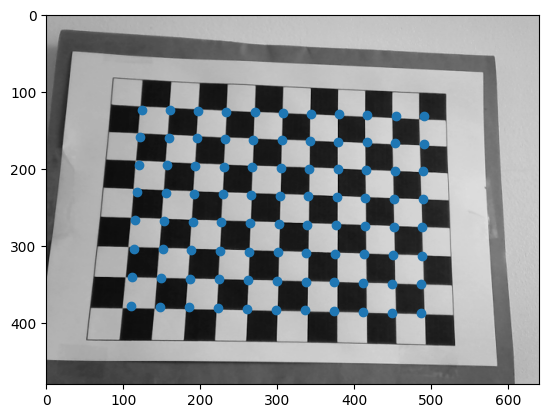

In [95]:
# plt.imshow(image1)
# px.figure()
# px.scatter(coord_px_center[:,0],coord_px_center[:,1])
# px.imshow(image1)
plt.figure()
plt.imshow(image1)
plt.scatter(aU[:88,0],aU[:88,1])
plt.show()
plt.figure()
plt.imshow(image2)
plt.scatter(aU[88:,0],aU[88:,1])
plt.show()
